# **PROBLEM STASTEMENT**

Problem Statement: River Water Quality Analysis in India – 2023
##Objective:
To analyze the river water quality across various Indian states using water quality monitoring data from 2023. The goal is to assess the health of rivers by computing pollution metrics such as the Water Pollution Index (WPI) and identifying rivers and regions with safe or unsafe water based on environmental standards.

#Background:
India's rivers are crucial lifelines for agriculture, drinking water, biodiversity, and cultural heritage. However, increasing industrialization, urbanization, and waste discharge threaten their quality. This dataset, published by pollution control authorities, includes water quality parameters from rivers like Beas, Sutlej, Ravi, Chenab, Tawi, and their tributaries, monitored across multiple stations.



# **STEPS**
1.Library Imports
2.Data Loading
3.Data Inspection
4.Data Cleaning
5.Column Filtering
6.Data Cleaning (Cont.)
7.Univariate Analysis
8.Bivariate Analysis
9.Outlier Detection
10.Correlation Analysis











# **DATA** **LOADING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **Mounting Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading CSV File**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/INNTER SHIP/sheet 1 (1).csv')

In [ ]:
df

,AVG TEMP,AVG DOG,AVG PH,AVG CONDUCTIVITY,AVG BOD,AVG NITRATE N,AVG FECAL COLIFORM,AVG TOTAL COLIFORM,AVG FECAL STREPTOCOCCI,Station Code,Monitoring Location,State,Water_Quality
0,13.0,8.50,7.70,224.0,1.90,0.735,86.0,301.5,2.0,1001,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,Good
1,7.5,8.30,7.30,96.5,1.90,1.095,855.0,1260.0,2.0,2601,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,Good
2,7.5,8.30,7.25,87.5,1.90,0.700,855.0,975.0,2.0,4444,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,Good
3,8.0,8.40,7.15,94.5,1.00,1.030,66.0,309.5,2.0,4037,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,Moderate
4,7.5,8.45,7.40,82.0,1.00,0.645,71.5,270.0,2.0,3866,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,25.5,7.60,7.70,254.0,1.75,0.590,1265.0,3100.0,0.0,3943,RIVER BUDHABALANGA AT BALASORE U/S,ODISHA,Good
1610,25.0,6.40,7.70,276.5,1.45,0.625,6539.0,17745.0,0.0,3942,"RIVER SONO AT KANAKDURGA ROAD NEAR REMUNA, HAT...",ODISHA,Good
1611,21.0,7.15,8.15,387.0,1.40,0.995,2.0,50.0,0.0,2115,RIVER TAPTI AT NEPA NAGAR 100 METRE D/S AFTER ...,MADHYA PRADESH,Good
1612,17.5,3.25,6.55,0.0,7.10,0.000,0.0,0.0,0.0,4753,"RIVER HARMU NEAR HARMU BRIDGE, HARMU, RANCHI",JHARKHAND,Poor


In [ ]:
# head() returns the default  top 5 rows
df.head()

,AVG TEMP,AVG DOG,AVG PH,AVG CONDUCTIVITY,AVG BOD,AVG NITRATE N,AVG FECAL COLIFORM,AVG TOTAL COLIFORM,AVG FECAL STREPTOCOCCI,Station Code,Monitoring Location,State,Water_Quality
0,13.0,8.50,7.70,224.0,1.9,0.735,86.0,301.5,2.0,1001,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,Good
1,7.5,8.30,7.30,96.5,1.9,1.095,855.0,1260.0,2.0,2601,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,Good
2,7.5,8.30,7.25,87.5,1.9,0.700,855.0,975.0,2.0,4444,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,Good
3,8.0,8.40,7.15,94.5,1.0,1.030,66.0,309.5,2.0,4037,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,Moderate
4,7.5,8.45,7.40,82.0,1.0,0.645,71.5,270.0,2.0,3866,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,Moderate


In [ ]:
# tail() returns the default bottom  5 rowsdf.tail()
df.tail()

,AVG TEMP,AVG DOG,AVG PH,AVG CONDUCTIVITY,AVG BOD,AVG NITRATE N,AVG FECAL COLIFORM,AVG TOTAL COLIFORM,AVG FECAL STREPTOCOCCI,Station Code,Monitoring Location,State,Water_Quality
1609,25.5,7.60,7.70,254.0,1.75,0.590,1265.0,3100.0,0.0,3943,RIVER BUDHABALANGA AT BALASORE U/S,ODISHA,Good
1610,25.0,6.40,7.70,276.5,1.45,0.625,6539.0,17745.0,0.0,3942,"RIVER SONO AT KANAKDURGA ROAD NEAR REMUNA, HAT...",ODISHA,Good
1611,21.0,7.15,8.15,387.0,1.40,0.995,2.0,50.0,0.0,2115,RIVER TAPTI AT NEPA NAGAR 100 METRE D/S AFTER ...,MADHYA PRADESH,Good
1612,17.5,3.25,6.55,0.0,7.10,0.000,0.0,0.0,0.0,4753,"RIVER HARMU NEAR HARMU BRIDGE, HARMU, RANCHI",JHARKHAND,Poor
1613,18.2,3.95,6.60,0.0,7.80,0.000,0.0,0.0,0.0,4754,RIVER HARMU BEFORE METTING TO SWARNREKHA RIVER,JHARKHAND,Poor


In [ ]:
#info returns overall information about the data set count, dtype, memory usage,shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AVG TEMP                1614 non-null   float64
 1   AVG DOG                 1614 non-null   float64
 2   AVG PH                  1614 non-null   float64
 3   AVG CONDUCTIVITY        1614 non-null   float64
 4   AVG BOD                 1614 non-null   float64
 5   AVG NITRATE N           1614 non-null   float64
 6   AVG FECAL COLIFORM      1614 non-null   float64
 7   AVG TOTAL COLIFORM      1614 non-null   float64
 8   AVG FECAL STREPTOCOCCI  1614 non-null   float64
 9   Station Code            1614 non-null   int64  
 10  Monitoring Location     1614 non-null   object 
 11  State                   1614 non-null   object 
 12  Water_Quality           1614 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 164.1+ KB


In [ ]:
df.columns

Index(['AVG TEMP', 'AVG DOG', 'AVG PH', 'AVG CONDUCTIVITY', 'AVG BOD',
       'AVG NITRATE N', 'AVG FECAL COLIFORM', 'AVG TOTAL COLIFORM',
       'AVG FECAL STREPTOCOCCI', 'Station Code', 'Monitoring Location',
       'State', 'Water_Quality'],
      dtype='object')

In [ ]:
df.describe()

,AVG TEMP,AVG DOG,AVG PH,AVG CONDUCTIVITY,AVG BOD,AVG NITRATE N,AVG FECAL COLIFORM,AVG TOTAL COLIFORM,AVG FECAL STREPTOCOCCI,Station Code
count,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1.614000e+03,1.614000e+03,1.614000e+03,1614.000000
mean,22.578594,6.845539,7.637794,741.964064,4.027478,2.573683,3.302143e+04,1.669270e+05,1.137918e+03,4526.395911
std,5.836942,1.768679,0.517729,2298.881815,8.080069,12.514690,3.817858e+05,2.493735e+06,3.072466e+04,5967.090834
min,0.000000,0.000000,2.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,20.500000,6.050000,7.450000,196.250000,1.500000,0.420000,6.000000e+00,4.900000e+01,0.000000e+00,1818.250000
50%,24.000000,7.250000,7.700000,333.250000,1.975000,0.885000,6.600000e+01,4.475000e+02,2.000000e+00,2952.500000
75%,26.500000,7.900000,7.900000,566.875000,3.000000,1.780000,1.045000e+03,2.695000e+03,8.375000e+00,4427.750000
max,33.000000,11.400000,9.000000,44300.000000,147.500000,395.425000,1.200110e+07,8.000350e+07,1.200340e+06,30089.000000


In [ ]:
df.size

20982

In [ ]:
#isnull().sum() it gives the count of the nullvalues for each columns
df.isnull().sum()

,0
AVG TEMP,0
AVG DOG,0
AVG PH,0
AVG CONDUCTIVITY,0
AVG BOD,0
AVG NITRATE N,0
AVG FECAL COLIFORM,0
AVG TOTAL COLIFORM,0
AVG FECAL STREPTOCOCCI,0
Station Code,0


In [ ]:
df.dtypes

,0
AVG TEMP,float64
AVG DOG,float64
AVG PH,float64
AVG CONDUCTIVITY,float64
AVG BOD,float64
AVG NITRATE N,float64
AVG FECAL COLIFORM,float64
AVG TOTAL COLIFORM,float64
AVG FECAL STREPTOCOCCI,float64
Station Code,int64


In [ ]:
# df.select_dtypes("object").columns it returns the categorical(object type columns) columns
cat_column=df.select_dtypes("object").columns
cat_column

Index(['Monitoring Location', 'State', 'Water_Quality'], dtype='object')

In [ ]:
#df.select_dtypes(["int","float"]).columns ,it returns numerical(int,float) columns

num_column=df.select_dtypes(["int","float"]).columns
num_column

Index(['AVG TEMP', 'AVG DOG', 'AVG PH', 'AVG CONDUCTIVITY', 'AVG BOD',
       'AVG NITRATE N', 'AVG FECAL COLIFORM', 'AVG TOTAL COLIFORM',
       'AVG FECAL STREPTOCOCCI', 'Station Code'],
      dtype='object')

In [ ]:
# List of categorical/object-type columns to fill with their mode
categorical_columns = [
    'Fecal Streptococci (MPN/100ml) MIN',
    'Fecal Streptococci (MPN/100ml) MAX',
    'AVG TEMP', 'AVG DOG',
    'AVG CONDUCTIVITY', 'AVG FECAL COLIFORM',
    'AVG TOTAL COLIFORM', 'AVG FECAL STREPTOCOCCI'
]

# Fill missing values in each column with its mode
for col in categorical_columns:
    if col in df.columns:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
    else:
        print(f"Column not found: {col}")


Column not found: Fecal Streptococci (MPN/100ml) MIN
Column not found: Fecal Streptococci (MPN/100ml) MAX


In [ ]:
df.isnull().sum()

,0
AVG TEMP,0
AVG DOG,0
AVG PH,0
AVG CONDUCTIVITY,0
AVG BOD,0
AVG NITRATE N,0
AVG FECAL COLIFORM,0
AVG TOTAL COLIFORM,0
AVG FECAL STREPTOCOCCI,0
Station Code,0


In [ ]:
print(df.columns.tolist())


['AVG TEMP', 'AVG DOG', 'AVG PH', 'AVG CONDUCTIVITY', 'AVG BOD', 'AVG NITRATE N', 'AVG FECAL COLIFORM', 'AVG TOTAL COLIFORM', 'AVG FECAL STREPTOCOCCI', 'Station Code', 'Monitoring Location', 'State', 'Water_Quality']


In [ ]:
# List of columns to keep
columns_to_keep = [
    'AVG TEMP', 'AVG DOG', 'AVG PH', 'AVG CONDUCTIVITY',
    'AVG BOD', 'AVG NITRATE N', 'AVG FECAL COLIFORM',
    'AVG TOTAL COLIFORM', 'AVG FECAL STREPTOCOCCI',
    'Station Code', 'Monitoring Location', 'State'
]

# Filter only existing columns to avoid KeyErrors
columns_to_keep = [col for col in columns_to_keep if col in df.columns]

# Keep only the specified columns
df = df[columns_to_keep]


In [ ]:
df.columns

Index(['AVG TEMP', 'AVG DOG', 'AVG PH', 'AVG CONDUCTIVITY', 'AVG BOD',
       'AVG NITRATE N', 'AVG FECAL COLIFORM', 'AVG TOTAL COLIFORM',
       'AVG FECAL STREPTOCOCCI', 'Station Code', 'Monitoring Location',
       'State'],
      dtype='object')

In [ ]:
df.isnull().sum()#It returns number of null values in each column

,0
AVG TEMP,0
AVG DOG,0
AVG PH,0
AVG CONDUCTIVITY,0
AVG BOD,0
AVG NITRATE N,0
AVG FECAL COLIFORM,0
AVG TOTAL COLIFORM,0
AVG FECAL STREPTOCOCCI,0
Station Code,0


In [ ]:
def classify_water_quality(row):
    if row['AVG BOD'] <= 1 and row['AVG TEMP'] >= 5.0:
        return 'Moderate'
    elif row['AVG BOD'] <= 3 and row['AVG PH'] >= 6.0:
        return 'Good'
    else:
        return 'Poor'

df['Water_Quality'] = df.apply(classify_water_quality, axis=1)



In [ ]:
df.size

20982

In [ ]:
df.shape

(1614, 13)

In [ ]:
df.isnull().sum()

,0
AVG TEMP,0
AVG DOG,0
AVG PH,0
AVG CONDUCTIVITY,0
AVG BOD,0
AVG NITRATE N,0
AVG FECAL COLIFORM,0
AVG TOTAL COLIFORM,0
AVG FECAL STREPTOCOCCI,0
Station Code,0


In [ ]:
df.replace('#DIV/0!', 0, inplace=True)

In [ ]:
cat_column=df.select_dtypes("object").columns
cat_column

Index(['Monitoring Location', 'State', 'Water_Quality'], dtype='object')

In [ ]:
df

,AVG TEMP,AVG DOG,AVG PH,AVG CONDUCTIVITY,AVG BOD,AVG NITRATE N,AVG FECAL COLIFORM,AVG TOTAL COLIFORM,AVG FECAL STREPTOCOCCI,Station Code,Monitoring Location,State,Water_Quality
0,13.0,8.50,7.70,224.0,1.90,0.735,86.0,301.5,2.0,1001,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,Good
1,7.5,8.30,7.30,96.5,1.90,1.095,855.0,1260.0,2.0,2601,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,Good
2,7.5,8.30,7.25,87.5,1.90,0.700,855.0,975.0,2.0,4444,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,Good
3,8.0,8.40,7.15,94.5,1.00,1.030,66.0,309.5,2.0,4037,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,Moderate
4,7.5,8.45,7.40,82.0,1.00,0.645,71.5,270.0,2.0,3866,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,25.5,7.60,7.70,254.0,1.75,0.590,1265.0,3100.0,0.0,3943,RIVER BUDHABALANGA AT BALASORE U/S,ODISHA,Good
1610,25.0,6.40,7.70,276.5,1.45,0.625,6539.0,17745.0,0.0,3942,"RIVER SONO AT KANAKDURGA ROAD NEAR REMUNA, HAT...",ODISHA,Good
1611,21.0,7.15,8.15,387.0,1.40,0.995,2.0,50.0,0.0,2115,RIVER TAPTI AT NEPA NAGAR 100 METRE D/S AFTER ...,MADHYA PRADESH,Good
1612,17.5,3.25,6.55,0.0,7.10,0.000,0.0,0.0,0.0,4753,"RIVER HARMU NEAR HARMU BRIDGE, HARMU, RANCHI",JHARKHAND,Poor


In [ ]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['AVG TEMP', 'AVG DOG', 'AVG PH', 'AVG CONDUCTIVITY', 'AVG BOD',
       'AVG NITRATE N', 'AVG FECAL COLIFORM', 'AVG TOTAL COLIFORM',
       'AVG FECAL STREPTOCOCCI', 'Station Code', 'Monitoring Location',
       'State', 'Water_Quality'],
      dtype='object')

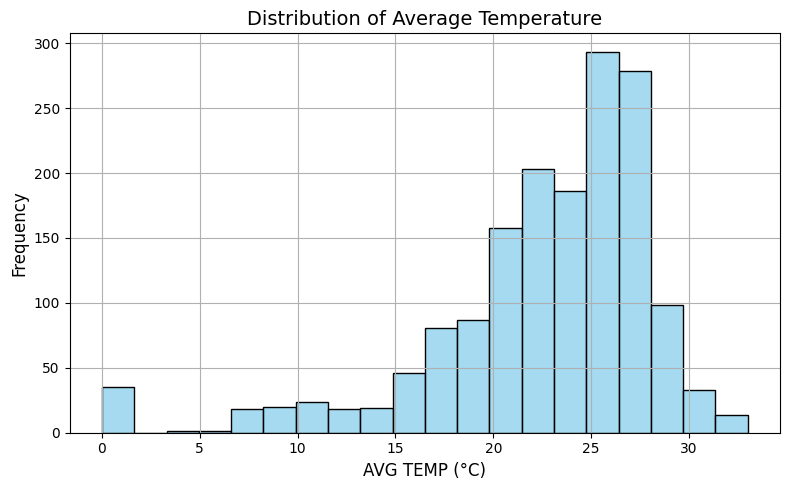

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert column to numeric just to be safe
df['AVG TEMP'] = pd.to_numeric(df['AVG TEMP'], errors='coerce')

# Drop NaN values
df = df.dropna(subset=['AVG TEMP'])

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(x='AVG TEMP', data=df, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('AVG TEMP (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Average Temperature', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


1.The histogram shows that most average temperatures fall between 22°C and 28°C, indicating a warm climate.
2.The highest frequency is around 25°C, with nearly 300 occurrences.
3.There are a few outliers with temperatures near 0°C and above 30°C, but they are rare.
4.The distribution is slightly right-skewed, suggesting fewer extremely high temperature



<Axes: >

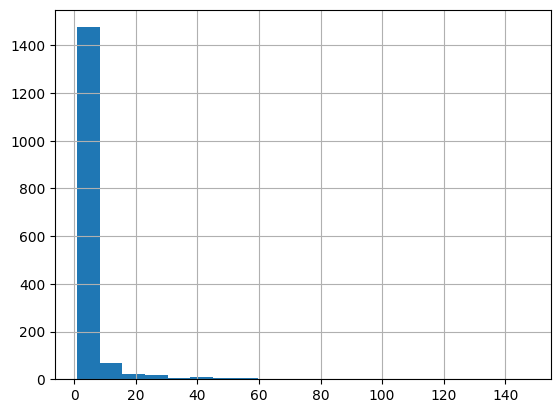

In [ ]:
df['AVG BOD'].hist(bins=20)


1.The data is highly right-skewed, with most values concentrated between 0 and 10.
2.The frequency is highest at the lowest range, with over 1400 occurrences.
3.Very few data points lie beyond 20, and values above 60 are extremely rare.
4.This suggests a distribution where small values are common, and large values are outliers.



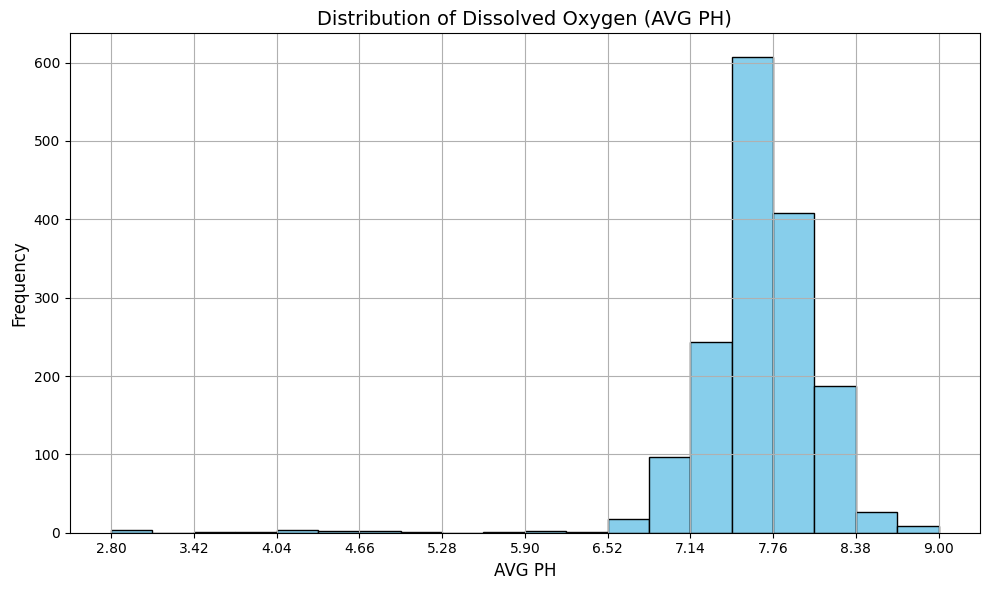

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram and capture bin edges
counts, bins, patches = plt.hist(df['AVG PH'], bins=20, color='skyblue', edgecolor='black')

# Set clean, evenly spaced x-ticks
plt.xticks(ticks=bins[::2], rotation=0)  # show every 2nd tick
plt.xlabel('AVG PH', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Dissolved Oxygen (AVG PH)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

1.The majority of pH values are clustered between 7.0 and 8.0, indicating neutral to slightly basic water conditions.
2.The peak frequency occurs around a pH of 7.6, with over 600 occurrences.
3.Very few samples have pH values below 6 or above 8.5, suggesting minimal acidic or highly alkaline conditions.
4.The distribution is slightly left-skewed, with a longer tail toward lower pH values.

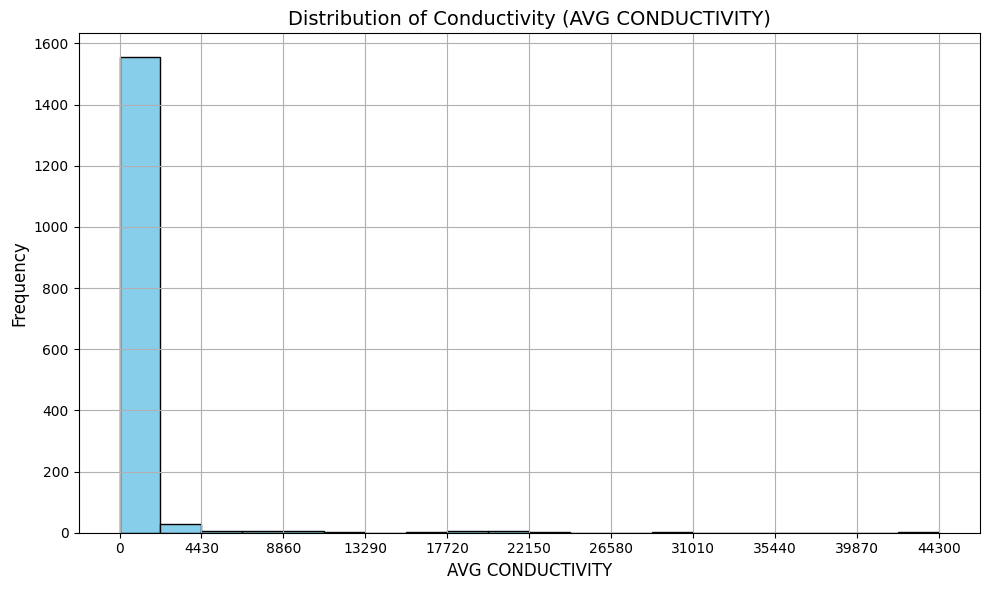

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import pandas as pd

# Ensure values are numeric
df['AVG CONDUCTIVITY'] = pd.to_numeric(df['AVG CONDUCTIVITY'], errors='coerce')
df = df.dropna(subset=['AVG CONDUCTIVITY'])

# Plot
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['AVG CONDUCTIVITY'], bins=20, color='skyblue', edgecolor='black')
plt.xticks(ticks=bins[::2], rotation=0)
plt.xlabel('AVG CONDUCTIVITY', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Conductivity (AVG CONDUCTIVITY)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


1.The distribution of average conductivity is highly right-skewed, with the majority of values concentrated in the lowest range (0–4430).
2.The first bin contains over 1500 samples, indicating low conductivity is most common.
3.Very few samples have conductivity values above 4430, and extremely high values are rare outliers.
4.This suggests that in most cases, water has low to moderate conductivity, with occasional extreme cases.

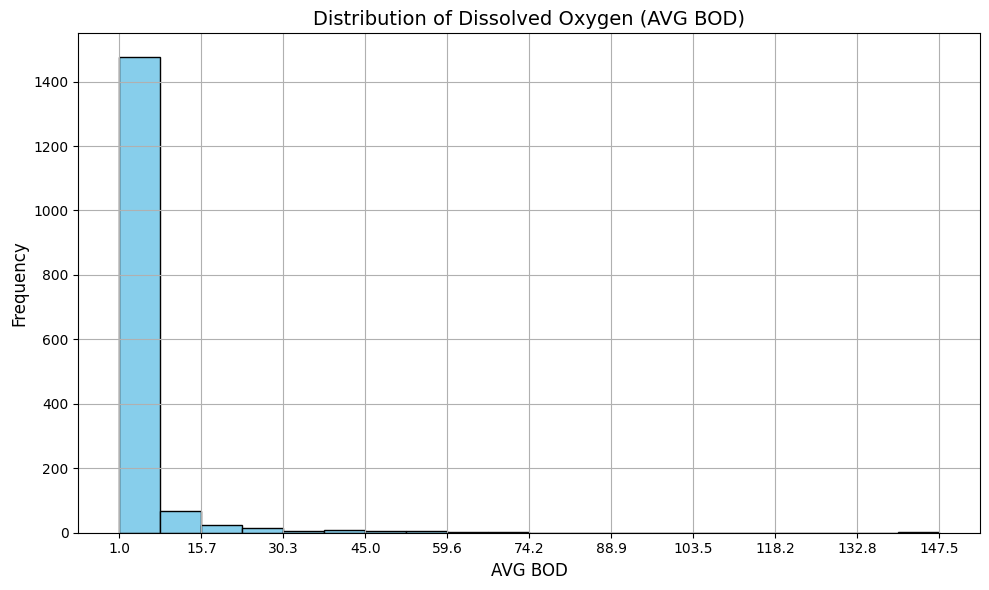

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot histogram and capture bin edges
counts, bins, patches = plt.hist(df['AVG BOD'], bins=20, color='skyblue', edgecolor='black')

# Set clean, evenly spaced x-ticks
plt.xticks(ticks=bins[::2], rotation=0)  # show every 2nd tick
plt.xlabel('AVG BOD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Dissolved Oxygen (AVG BOD)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

1.The average BOD (Biochemical Oxygen Demand) values are heavily concentrated in the lowest range (around 1.0), indicating low organic pollution in most samples.
2.The distribution is highly right-skewed, with a sharp drop in frequency as BOD increases.
3.Very few samples show BOD levels beyond 15.7, and extreme values above 100 are rare.
4.This suggests that water quality is generally good, with only a few instances of high organic contamination.

In [ ]:
df.columns

Index(['AVG TEMP', 'AVG DOG', 'AVG PH', 'AVG CONDUCTIVITY', 'AVG BOD',
       'AVG NITRATE N', 'AVG FECAL COLIFORM', 'AVG TOTAL COLIFORM',
       'AVG FECAL STREPTOCOCCI', 'Station Code', 'Monitoring Location',
       'State', 'Water_Quality'],
      dtype='object')

/tmp/ipython-input-38-1876379255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Water_Quality', y='AVG BOD', data=df, palette='pastel')


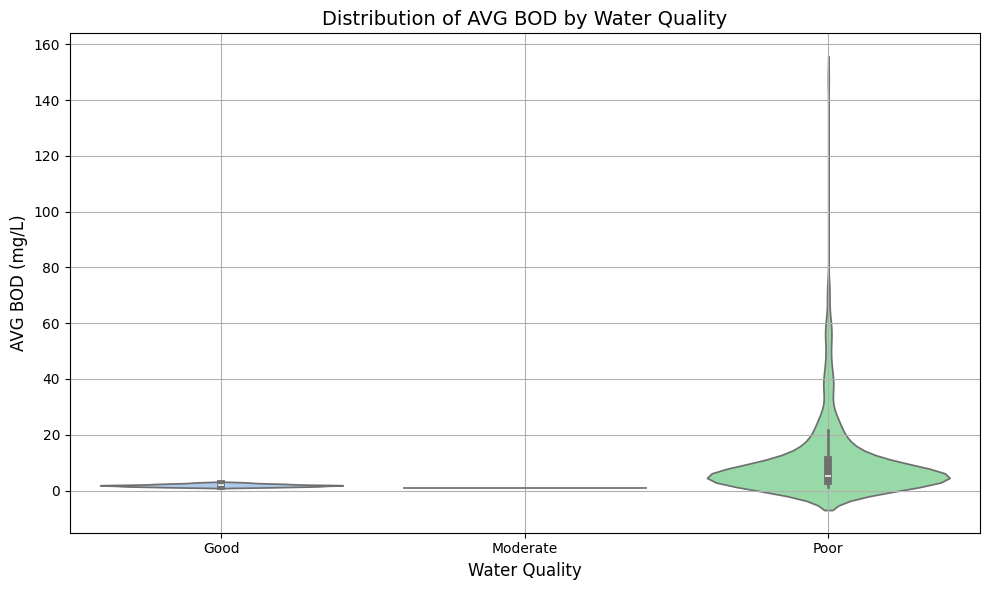

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='Water_Quality', y='AVG BOD', data=df, palette='pastel')
plt.title('Distribution of AVG BOD by Water Quality', fontsize=14)
plt.xlabel('Water Quality', fontsize=12)
plt.ylabel('AVG BOD (mg/L)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


1.The AVG BOD is lowest for "Good" and "Moderate" water quality categories,
2.generally ranging between 1 and 3 mg/L.
3.In contrast, the "Poor" category shows a much wider spread of BOD values, extending beyond 100 mg/L.
The distribution for "Poor" water quality is highly skewed with several extreme high values, indicating significant organic pollution in some samples.
4.This plot clearly shows that higher BOD levels are strongly associated with poor water quality.

In [ ]:
df.columns

Index(['AVG TEMP', 'AVG DOG', 'AVG PH', 'AVG CONDUCTIVITY', 'AVG BOD',
       'AVG NITRATE N', 'AVG FECAL COLIFORM', 'AVG TOTAL COLIFORM',
       'AVG FECAL STREPTOCOCCI', 'Station Code', 'Monitoring Location',
       'State', 'Water_Quality'],
      dtype='object')

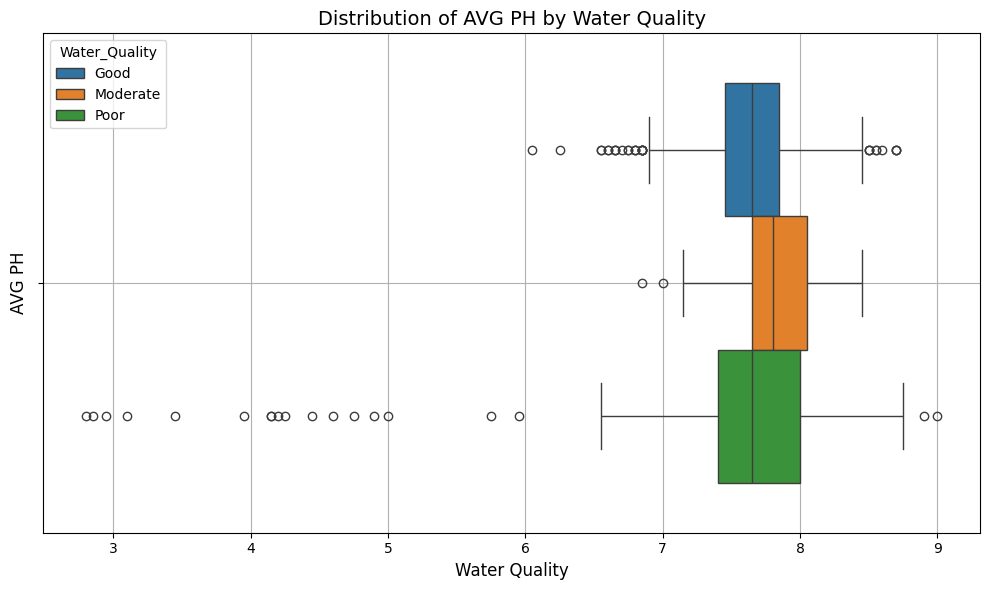

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AVG PH',hue='Water_Quality', data=df,)
plt.title('Distribution of AVG PH by Water Quality', fontsize=14)
plt.xlabel('Water Quality', fontsize=12)
plt.ylabel('AVG PH', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

1.The "Good" water quality category has a narrow pH range, mostly between 7.2 and 7.8, indicating stable and neutral conditions.
2."Moderate" quality shows a slightly wider range, overlapping both good and poor categories.
3.The "Poor" category exhibits the widest spread, including many extreme low and high pH outliers.
4.This suggests that unstable or extreme pH levels are associated with poorer water quality.

/tmp/ipython-input-41-3450725682.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AVG FECAL COLIFORM', y='Water_Quality', data=df, palette='Set2')


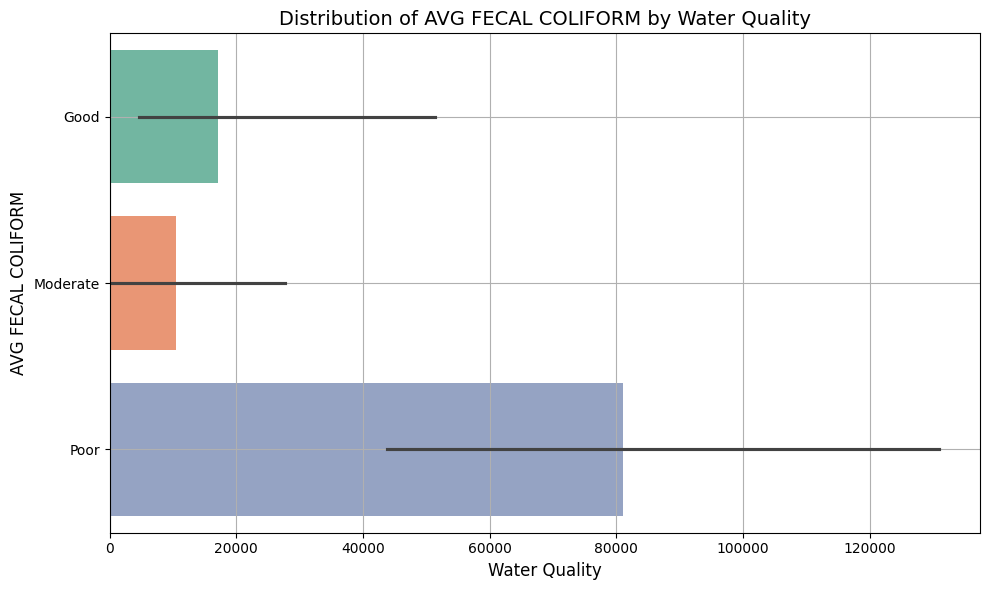

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Optional: clean column names and ensure numeric data
df.columns = df.columns.str.strip()
df['AVG FECAL COLIFORM'] = pd.to_numeric(df['AVG FECAL COLIFORM'], errors='coerce')
df = df.dropna(subset=['AVG FECAL COLIFORM', 'Water_Quality'])

# Plot boxplot: x = Water_Quality (categorical), y = AVG FECAL COLIFORM (numeric)
plt.figure(figsize=(10, 6))
sns.barplot(x='AVG FECAL COLIFORM', y='Water_Quality', data=df, palette='Set2')
plt.title('Distribution of AVG FECAL COLIFORM by Water Quality', fontsize=14)
plt.xlabel('Water Quality', fontsize=12)
plt.ylabel('AVG FECAL COLIFORM', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


1.The average fecal coliform levels are significantly higher in the "Poor" water quality category, exceeding 80,000 units.
2."Good" and "Moderate" categories have much lower values, generally under 20,000 and 10,000 respectively.
3.There is a large variation (error bars) in the "Poor" category, indicating inconsistent contamination levels.
4.This plot clearly shows that high fecal coliform concentration is a strong indicator of poor water quality.

In [ ]:
# Identify numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"{col}: {outliers.shape[0]} outliers")

AVG TEMP: 99 outliers
AVG DOG: 95 outliers
AVG PH: 42 outliers
AVG CONDUCTIVITY: 159 outliers
AVG BOD: 203 outliers
AVG NITRATE N: 145 outliers
AVG FECAL COLIFORM: 294 outliers
AVG TOTAL COLIFORM: 298 outliers
AVG FECAL STREPTOCOCCI: 333 outliers
Station Code: 172 outliers


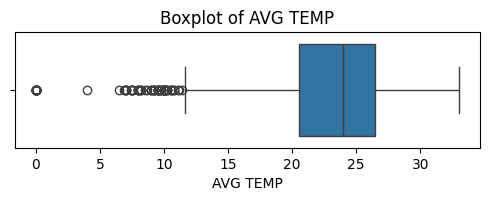

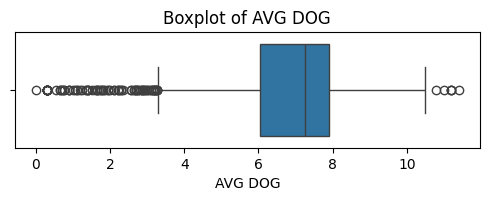

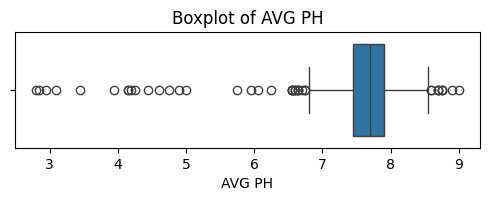

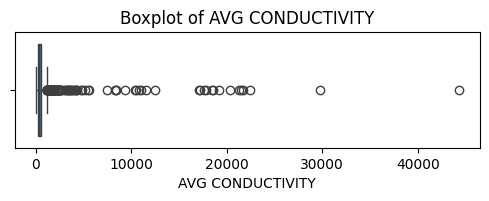

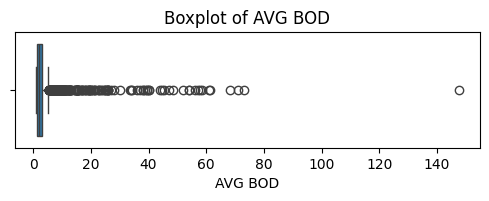

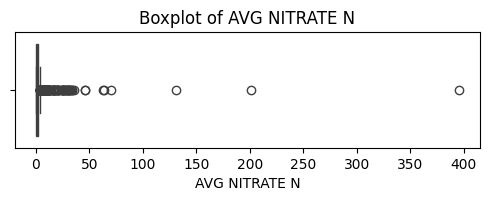

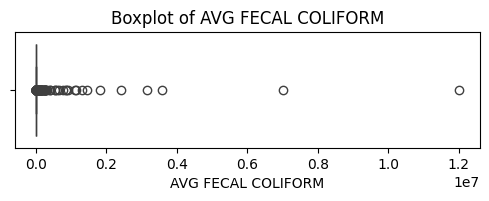

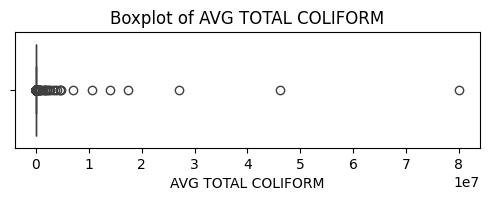

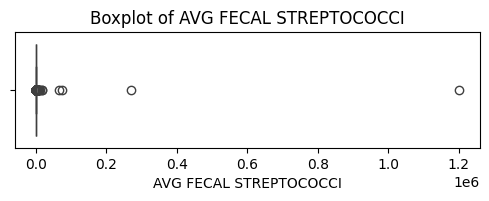

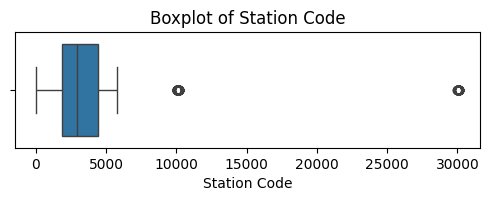

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

1.The average fecal streptococci values are mostly concentrated near the lower end of the scale.
2.The presence of multiple extreme outliers, including values exceeding 1 million, indicates significant variation in contamination levels.
3.The interquartile range is very narrow, suggesting most values are low and tightly grouped.
4.Overall, while the majority of samples have low streptococci counts, a few highly contaminated cases skew the distribution.

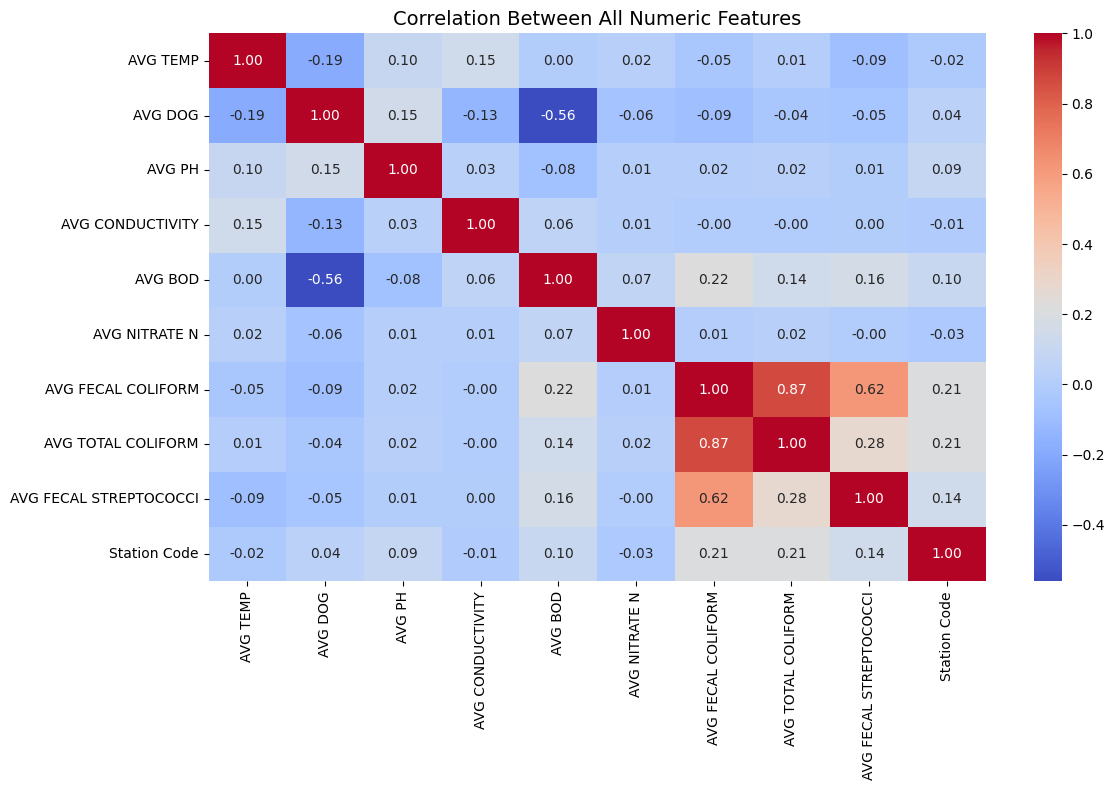

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=True)

# Get only numeric columns
num_column = df.select_dtypes(include='number').columns.tolist()

# Compute and plot correlation
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_column].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between All Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()


1.There is a strong positive correlation between AVG FECAL COLIFORM and AVG TOTAL COLIFORM (0.87), indicating they often increase together.
2.AVG BOD shows a moderate negative correlation with AVG DO (-0.56), which is expected as higher BOD reduces dissolved oxygen.
3.AVG FECAL STREPTOCOCCI also shows moderate correlation with AVG FECAL COLIFORM (0.62), suggesting related contamination sources.
4.Most other variables have weak or no correlation, indicating limited linear relationships among them.

In [ ]:
from google.colab import files
df.to_csv("/content/drive/MyDrive/INNTER SHIP/sheet 1 (1).csv", index=False)
files.download("/content/drive/MyDrive/INNTER SHIP/sheet 1 (1).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It saves a DataFrame df as a CSV file named "sheet 1 (1).csv" in the specified Google Drive folder: /content/drive/MyDrive/INNTER SHIP/.

It then triggers a download of this CSV file to the local system using files.download().

Purpose: This allows the user to both back up the dataset to Google Drive and download it directly for offline use or sharing